In [1]:
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
tmdb = pd.read_csv("data/archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0.5,1,'TMDB average movie vote')

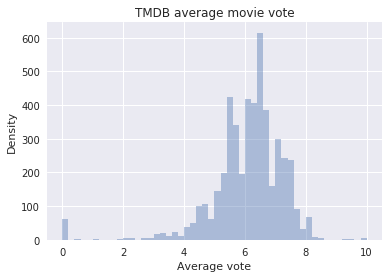

In [17]:
ax = sns.distplot(tmdb["vote_average"], norm_hist=False, kde=False)
ax.set(xlabel = "Average vote", ylabel = "Density")
ax.set_title("TMDB average movie vote")

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


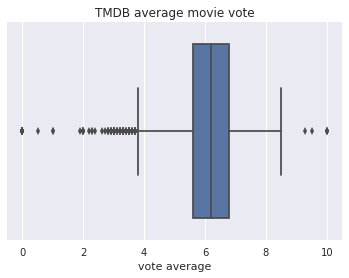

In [5]:
ax = sns.boxplot(data=tmdb, x="vote_average")
ax.set_title("TMDB average movie vote")
ax.set_xlabel("vote average");

The graphics above show that there are movies with vote average 0 and 10. 

That is unexpected, since we are working with average data (to be 0, all of the votes should be 0, and the same for average 10)

Let's get a closer look at these suspicious data.

In [9]:
tmdb.query("vote_average == 0")[["original_title", "vote_average", "vote_count"]].head(10)
# tmdb.loc[tmdb["vote_average"] == 0][["original_title", "vote_average", "vote_count"]]

,original_title,vote_average,vote_count
1464,Black Water Transit,0.0,0
3669,Should've Been Romeo,0.0,0
3670,Running Forever,0.0,0
3852,The Secret,0.0,0
3855,Time to Choose,0.0,0
3960,The Deported,0.0,0
3967,Four Single Fathers,0.0,0
4051,8 Days,0.0,0
4065,Mi America,0.0,0
4068,Sharkskin,0.0,0


In [11]:
tmdb.query("vote_average == 10")[["original_title", "vote_average", "vote_count"]]
# tmdb.loc[tmdb["vote_average"] == 0][["original_title", "vote_average", "vote_count"]]

,original_title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4045,"Dancer, Texas Pop. 81",10.0,1
4247,Me You and Five Bucks,10.0,2
4662,Little Big Top,10.0,1


As we can see on the tables above, there are some movies with very few votes (some with no vote).

Therefore, these movies won't be a part of our analysis from now on. 

Let's only consider movies with at least 10 votes!

In [ ]:
tmdb_more_than_10_votes = tmdb.query("vote_count > 10")
tmdb_more_than_10_votes.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.358000e+03,4358.000000,4358.000000,4.358000e+03,4357.000000,4358.000000,4358.000000
mean,3.186705e+07,49112.662001,23.619184,9.059446e+07,108.496443,6.232010,760.249656
std,4.171009e+07,80167.435191,32.661510,1.687623e+08,21.000772,0.888111,1275.510839
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,11.000000
25%,3.000000e+06,8358.250000,6.719426,4.814275e+04,95.000000,5.700000,87.000000
50%,1.800000e+07,12960.500000,14.955512,2.744996e+07,105.000000,6.300000,292.000000
75%,4.300000e+07,46528.750000,30.433317,1.031351e+08,119.000000,6.800000,835.750000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5,1,'TMDB average movie vote - \n considering only movies with at least 10 votes')

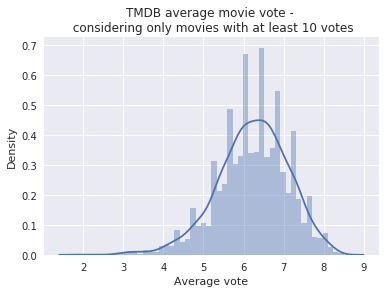

In [18]:
ax = sns.distplot(tmdb_more_than_10_votes["vote_average"])
ax.set(xlabel = "Average vote", ylabel = "Density")
ax.set_title("TMDB average movie vote - \n considering only movies with at least 10 votes")

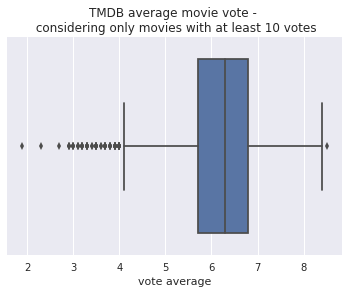

In [14]:
ax = sns.boxplot(data=tmdb_more_than_10_votes, x="vote_average")
ax.set_title("TMDB average movie vote - \n considering only movies with at least 10 votes")
ax.set_xlabel("vote average");